In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/SHA256SUMS.txt
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/SC-subjects.xls
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/RECORDS
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/RECORDS-v1
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/ST-subjects.xls
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4312E0-PSG.edf
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4321EC-Hypnogram.edf
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4012E0-PSG.edf
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4511EJ-Hypnogram.edf
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4412E0-PSG.edf
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4212E0-PSG.edf
/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4721EC-Hypnogram.edf
/kaggle/

In [2]:
import mne

In [3]:
!pip install pyEDFlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.5 MB/s eta 0:00:0000:0100:01


In [4]:
import numpy as np
import mne
edf = mne.io.read_raw_edf('/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4312E0-PSG.edf')
header = ','.join(edf.ch_names)
np.savetxt('sleep.csv', edf.get_data().T, delimiter=',', header=header)

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4312E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [5]:
raw_data = edf.get_data()

In [6]:
import pyedflib
import numpy as np
import os

file_name = ('/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4012E0-PSG.edf')
f = pyedflib.EdfReader(file_name)
annotations = f.readAnnotations()  
print(annotations)  

(array([], dtype=float64), array([], dtype=float64), array([], dtype=float64))


In [7]:
import pandas as pd
sleep_data = pd.read_csv('sleep.csv')

In [8]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100000 entries, 0 to 8099999
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   # EEG Fpz-Cz    float64
 1   EEG Pz-Oz       float64
 2   EOG horizontal  float64
 3   Resp oro-nasal  float64
 4   EMG submental   float64
 5   Temp rectal     float64
 6   Event marker    float64
dtypes: float64(7)
memory usage: 432.6 MB


# **DATA EXPLORATION**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.sleep_physionet.age import fetch_data

In [10]:
ALICE, BOB = 0, 1

[alice_files, bob_files] = fetch_data(subjects=[ALICE, BOB], recording=[1])

mapping = {'EOG horizontal': 'eog',
           'Resp oro-nasal': 'misc',
           'EMG submental': 'misc',
           'Temp rectal': 'misc',
           'Event marker': 'misc'}

Using default location ~/mne_data for PHYSIONET_SLEEP...
Creating ~/mne_data


100%|█████████████████████████████████████| 48.3M/48.3M [00:00<00:00, 54.9GB/s]
100%|█████████████████████████████████████| 4.62k/4.62k [00:00<00:00, 5.63MB/s]
100%|█████████████████████████████████████| 51.1M/51.1M [00:00<00:00, 46.5GB/s]
100%|█████████████████████████████████████| 3.90k/3.90k [00:00<00:00, 5.26MB/s]

Download complete in 02m29s (94.8 MB)


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_34/3452215393.py:5: RuntimeWarning: The unit for channel(s) EMG submental, Event marker, Resp oro-nasal, Temp rectal has changed from V to NA.
  raw_train.set_channel_types(mapping)
/tmp/ipykernel_34/3452215393.py:8: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  raw_train.plot(duration=60, scalings='auto')


Using matplotlib as 2D backend.


/tmp/ipykernel_34/3452215393.py:8: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  raw_train.plot(duration=60, scalings='auto')


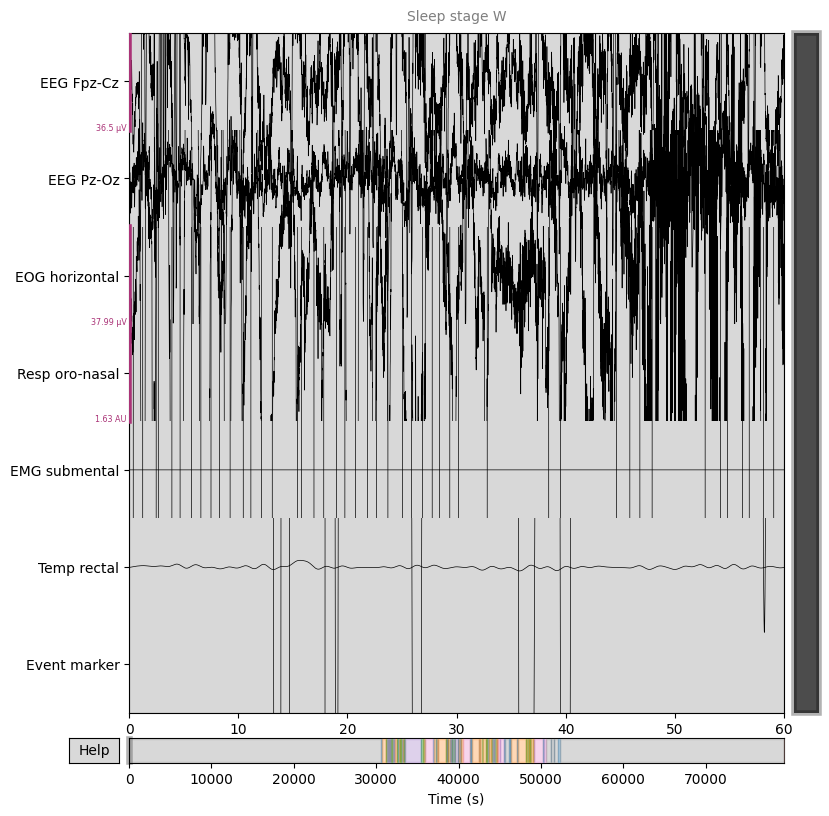

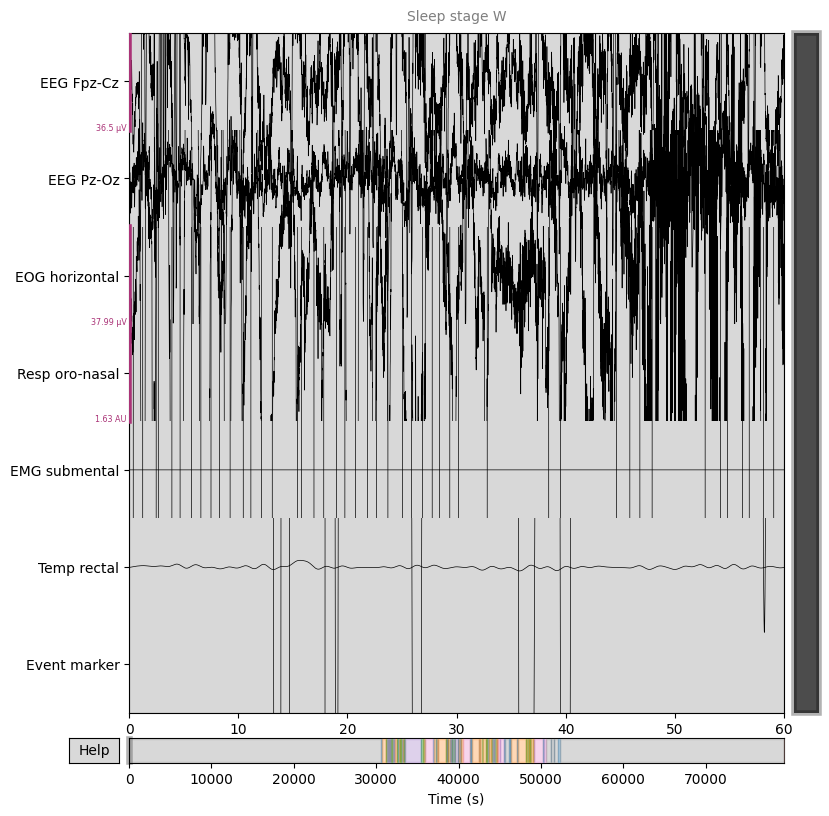

In [11]:
raw_train = mne.io.read_raw_edf(alice_files[0])
annot_train = mne.read_annotations(alice_files[1])

raw_train.set_annotations(annot_train, emit_warning=False)
raw_train.set_channel_types(mapping)

# plot some data
raw_train.plot(duration=60, scalings='auto')

In [12]:
annotation_desc_2_event_id = {'Sleep stage W': 1,
                              'Sleep stage 1': 2,
                              'Sleep stage 2': 3,
                              'Sleep stage 3': 4,
                              'Sleep stage 4': 4,
                              'Sleep stage R': 5}

events_train, _ = mne.events_from_annotations(
    raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


In [13]:
# create a new event_id that unifies stages 3 and 4
event_id = {'Sleep stage W': 1,
            'Sleep stage 1': 2,
            'Sleep stage 2': 3,
            'Sleep stage 3/4': 4,
            'Sleep stage R': 5}

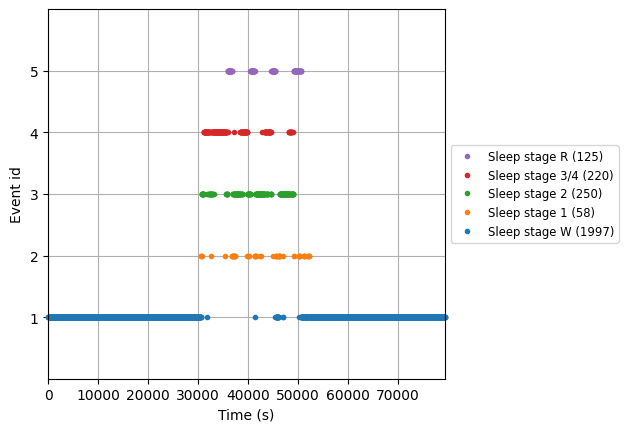

In [14]:
# plot events
mne.viz.plot_events(events_train, event_id=event_id,
                    sfreq=raw_train.info['sfreq'])

# keep the color-code for further plotting
stage_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [15]:
tmax = 30. - 1. / raw_train.info['sfreq']  # tmax in included

epochs_train = mne.Epochs(raw=raw_train, events=events_train,
                          event_id=event_id, tmin=0., tmax=tmax, baseline=None)

print(epochs_train)

Not setting metadata
2650 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  2650 events (good & bad), 0 – 29.99 s, baseline off, ~13 kB, data not loaded,
 'Sleep stage W': 1997
 'Sleep stage 1': 58
 'Sleep stage 2': 250
 'Sleep stage 3/4': 220
 'Sleep stage R': 125>


In [16]:
raw_test = mne.io.read_raw_edf(bob_files[0])
annot_test = mne.read_annotations(bob_files[1])
raw_test.set_annotations(annot_test, emit_warning=False)
raw_test.set_channel_types(mapping)
events_test, _ = mne.events_from_annotations(
    raw_test, event_id=annotation_desc_2_event_id, chunk_duration=30.)
epochs_test = mne.Epochs(raw=raw_test, events=events_test, event_id=event_id,
                         tmin=0., tmax=tmax, baseline=None)

print(epochs_test)

Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_34/3850889373.py:4: RuntimeWarning: The unit for channel(s) EMG submental, Event marker, Resp oro-nasal, Temp rectal has changed from V to NA.
  raw_test.set_channel_types(mapping)


Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
2802 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  2802 events (good & bad), 0 – 29.99 s, baseline off, ~13 kB, data not loaded,
 'Sleep stage W': 1856
 'Sleep stage 1': 109
 'Sleep stage 2': 562
 'Sleep stage 3/4': 105
 'Sleep stage R': 170>


In [17]:
!pip install --upgrade yasa

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 38.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.1 MB/s eta 0:00:00
  Created wheel for pyriemann: filename=pyriemann-0.5-py2.py3-none-any.whl size=107752 sha256=ea965992274257b3868957a137aa1baf2cd5c55df8de284917ac9d86d652eeae
  Stored in directory: /root/.cache/pip/wheels/84/86/79/622e9c1dc933dc088e287ebfaac5aa9bdc6a38a9db193ce1f1
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16879 sha256=cabc271db9c198fd3ec651eaf253d53db925f89e07bd5a2eb8a97

In [21]:
!pip install pyeeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 82.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 17.3 MB/s eta 0:00:00
  Created wheel for websocket: filename=websocket-0.2.1-py3-none-any.whl size=192113 sha256=3b9790a6967bb4bed6c9f7578619df296516c3a0edfd7f952c58e3eb2ae04a45
  Stored in directory: /root/.cache/pip/wheels/4a/26/a1/27748366e5f1592b3ff2b896a45fe35be66c257b7926bc5b08
Successfully built websocket


In [32]:
!pip install mne==1.6.1



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.6 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: mne
    Found existing installation: mne 0.23.0
    Uninstalling mne-0.23.0:
      Successfully uninstalled mne-0.23.0


In [67]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git


  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-whlqaqud
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-whlqaqud
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras_contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101060 sha256=67b033ec906768da5bf527c21865a0086a7985df3ac27b9b0bd216b13451f877
  Stored in directory: /tmp/pip-ephem-wheel-cache-zusq2jwe/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras_contrib


In [68]:
%matplotlib inline

import glob
import math
import ntpath
import random, os, sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('/kaggle/input/edfreader/edfreader.py')

import edfreader
import models
import mne
import warnings
warnings.filterwarnings('ignore')

from matplotlib.backends.backend_pdf import PdfPages
from mne.datasets.sleep_physionet._utils import _fetch_one, _data_path, AGE_SLEEP_RECORDS, _check_subjects
from datetime import datetime
from mne import Epochs, pick_types, find_events
from mne.io import concatenate_raws, read_raw_edf

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import FunctionTransformer
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
# from tensorflow.keras import optimizers, losses
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, MaxPool1D, Activation, SpatialDropout1D, GlobalMaxPool1D
# from tensorflow.keras.layers import Reshape, LSTM, TimeDistributed, Bidirectional, BatchNormalization, Flatten, RepeatVector
# from tensorflow.keras.layers import concatenate
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from imblearn.over_sampling import SMOTE
import joblib
# from sklearn.preprocessing import StandardScaler
# from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_auc_score, roc_curve
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

VBS = True  # constant boolean to enable/disbale verbose
EPOCH_SEC_SIZE = 30  # Epoch duration selection
seed = 42  # seed value for the random seeds
batch_size = 64
number_of_subj = 50

# values to label the stages
UNKNOWN = -1
W = 0
N1 = 1
N2 = 2
N3 = 3
REM = 4

# making string dictionary for the label values
label_dict = {
    "UNKNOWN"  : UNKNOWN,
    "W"        : W,
    "N1"       : N1,
    "N2"       : N2,
    "N3"       : N3,
    "REM"      : REM
}

# converting from label values to strings 
class_dict = {
    -1: "UNKNOWN",
    0 : "W",
    1 : "N1",
    2 : "N2",
    3 : "N3",
    4 : "REM"
}

# annotation dictionary to convert from string to label values
annot2label = {
    "Sleep stage ?": -1,
    "Movement time": -1,
    "Sleep stage W": 0,
    "Sleep stage 1": 1,
    "Sleep stage 2": 2,
    "Sleep stage 3": 3,
    "Sleep stage 4": 3,
    "Sleep stage R": 4
}
project_path = '/kaggle/working/'

In [69]:
data_folder_path = '/kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/'

def fetch_data(subjects, recording=[1, 2], path=None, force_update=False,
               update_path=None, base_url=BASE_URL,
               verbose=None):
    records = np.loadtxt(AGE_SLEEP_RECORDS,
                         skiprows=1,
                         delimiter=',',
                         usecols=(0, 1, 2, 6, 7),
                         dtype={'names': ('subject', 'record', 'type', 'sha',
                                          'fname'),
                                'formats': ('<i2', 'i1', '<S9', 'S40', '<S22')}
                         )
    psg_records = records[np.where(records['type'] == b'PSG')]
    hyp_records = records[np.where(records['type'] == b'Hypnogram')]

    # Using a different name for the path variable
    data_path = data_folder_path
    params = [data_path, force_update, base_url]
    fnames = []
    for subject in subjects:
        for idx in np.where(psg_records['subject'] == subject)[0]:
            if psg_records['record'][idx] in recording:
                psg_fname = _fetch_one(psg_records['fname'][idx].decode(),
                                       psg_records['sha'][idx].decode(),
                                       *params)
                hyp_fname = _fetch_one(hyp_records['fname'][idx].decode(),
                                       hyp_records['sha'][idx].decode(),
                                       *params)
                fnames.append([psg_fname, hyp_fname])

    return fnames


In [70]:
# Retrieve the list of subjects
subjects_list = []
except_sub = [13, 36, 52]  
for i in range(83):
    if i in except_sub:
        continue
    subjects_list.append(i)

# Fetch data for the subjects
subject_files = fetch_data(subjects=subjects_list, recording=[1, 2], path=project_path)

# Mapping dictionary
mapping = {'EOG horizontal': 'eog',
           'Resp oro-nasal': 'misc',
           'EMG submental': 'misc',
           'Temp rectal': 'misc',
           'Event marker': 'misc'}

In [74]:
ch_labels = 'EEG Fpz-Cz'  # channels to be selected
data_frames = []
if VBS:
    print("Importing data into dataframes:")
output_path = os.path.join(project_path, "NPZ_files")  # path to save the npz files
# loop to preprocess input data and save the results in npz files to be used in our models later
for item in tqdm(subject_files):
    psg_file_path = item[0][0]  # Accessing the PSG file path from the first tuple in the item list
    filename = ntpath.basename(psg_file_path).replace("-PSG.edf", ".npz")  # reading the PSG files
    if not os.path.exists(os.path.join(output_path, filename)):
        raw_train = mne.io.read_raw_edf(item[0][0], verbose=VBS)
        sampling_rate = raw_train.info['sfreq']
        raw_ch_df = raw_train.to_data_frame()

        # Scale the time axis by a factor of 100
        raw_ch_df.index *= 100

        raw_ch_df = raw_ch_df[ch_labels]

        # reading the raw headers using the EDFReader function from edfreader
        f = open(item[0][0], 'r', errors='ignore', encoding='utf-8')
        head_raw_read = edfreader.BaseEDFReader(f)
        head_raw_read.read_header()
        head_raw = head_raw_read.header
        f.close()
        raw_start_time = datetime.strptime(head_raw['date_time'], "%Y-%m-%d %H:%M:%S")

        # read annotations from hypnogram file
        f = open(item[1][0], 'r')
        annot_raw_read = edfreader.BaseEDFReader(f)
        annot_raw_read.read_header()
        annot_raw = annot_raw_read.header
        temp, temp, total_annot = zip(*annot_raw_read.records())
        f.close()
        annot_start_time = datetime.strptime(annot_raw['date_time'], "%Y-%m-%d %H:%M:%S")
        assert raw_start_time == annot_start_time  # making sure that the PSG files and hypnogram files are in sync
        remove_idx = []    # list to keep the indicies of data that will be removed
        labels = []        # list to keep the indicies of data that have labels
        label_idx = []
        
        # selecting the indicies of known labels and adding the rest to remove_idx list
        for annot in total_annot[0]:
            onset_sec, duration_sec, annot_char = annot
            annot_str = "".join(annot_char)
            label = annot2label[annot_str]
            if label != UNKNOWN:
                if duration_sec % EPOCH_SEC_SIZE != 0:
                    raise Exception("Please choose anothe epoch duration!")
                duration_epoch = int(duration_sec / EPOCH_SEC_SIZE)
                label_epoch = np.ones(duration_epoch, dtype=int) * label
                labels.append(label_epoch)
                idx = int(onset_sec * sampling_rate) + np.arange(duration_sec * sampling_rate, dtype=int)
                label_idx.append(idx)
            else:
                idx = int(onset_sec * sampling_rate) + np.arange(duration_sec * sampling_rate, dtype=int)
                remove_idx.append(idx)
        labels = np.hstack(labels)
        if len(remove_idx) > 0:
            remove_idx = np.hstack(remove_idx)
            select_idx = np.setdiff1d(np.arange(len(raw_ch_df)), remove_idx)
        else:
            select_idx = np.arange(len(raw_ch_df))

        # filtering data with labels only
        label_idx = np.hstack(label_idx)
        select_idx = np.intersect1d(select_idx, label_idx)

        # removing extra indicies
        if len(label_idx) > len(select_idx):
            extra_idx = np.setdiff1d(label_idx, select_idx)
            # trimming the tail
            if np.all(extra_idx > select_idx[-1]):
                n_trims = len(select_idx) % int(EPOCH_SEC_SIZE * sampling_rate)
                n_label_trims = int(math.ceil(n_trims / (EPOCH_SEC_SIZE * sampling_rate)))
                select_idx = select_idx[:-n_trims]
                labels = labels[:-n_label_trims]

        # removing all unknown and movement labels
        raw_ch = raw_ch_df.values[select_idx]

        # check if we can split into epochs' size
        if len(raw_ch) % (EPOCH_SEC_SIZE * sampling_rate) != 0:
            raise Exception("Please choose anothe epoch duration!")
        n_epochs = len(raw_ch) / (EPOCH_SEC_SIZE * sampling_rate)

        # get epochs and their corresponding labels
        x = np.asarray(np.split(raw_ch, n_epochs)).astype(np.float32)
        y = labels.astype(np.int32)

        assert len(x) == len(y)

        # select on sleep periods
        w_edge_mins = 30
        nw_idx = np.where(y != label_dict["W"])[0]
        start_idx = nw_idx[0] - (w_edge_mins * 2)
        end_idx = nw_idx[-1] + (w_edge_mins * 2)
        if start_idx < 0: start_idx = 0
        if end_idx >= len(y): end_idx = len(y) - 1
        select_idx = np.arange(start_idx, end_idx+1)
        x = x[select_idx]
        y = y[select_idx]

        # file structure for saving
        save_dict = {
            "x": x, 
            "y": y, 
            "fs": sampling_rate,
            "ch_label": ch_labels,
            "header_raw": head_raw,
            "header_annotation": annot_raw,
        }
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        np.savez(os.path.join(output_path, filename), **save_dict)

Importing data into dataframes:


  0%|          | 0/150 [00:00<?, ?it/s]

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4012E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
C

  0%|          | 0/20 [00:00<?, ?it/s]

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

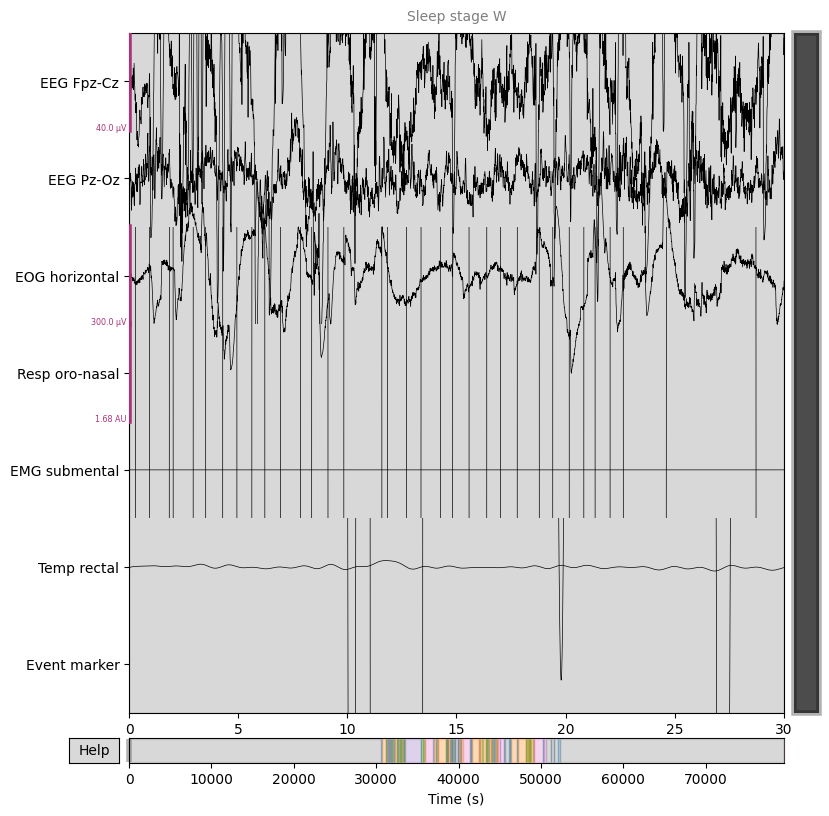

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


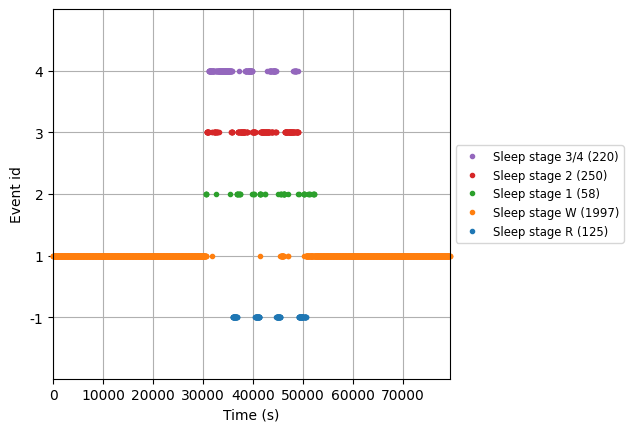

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

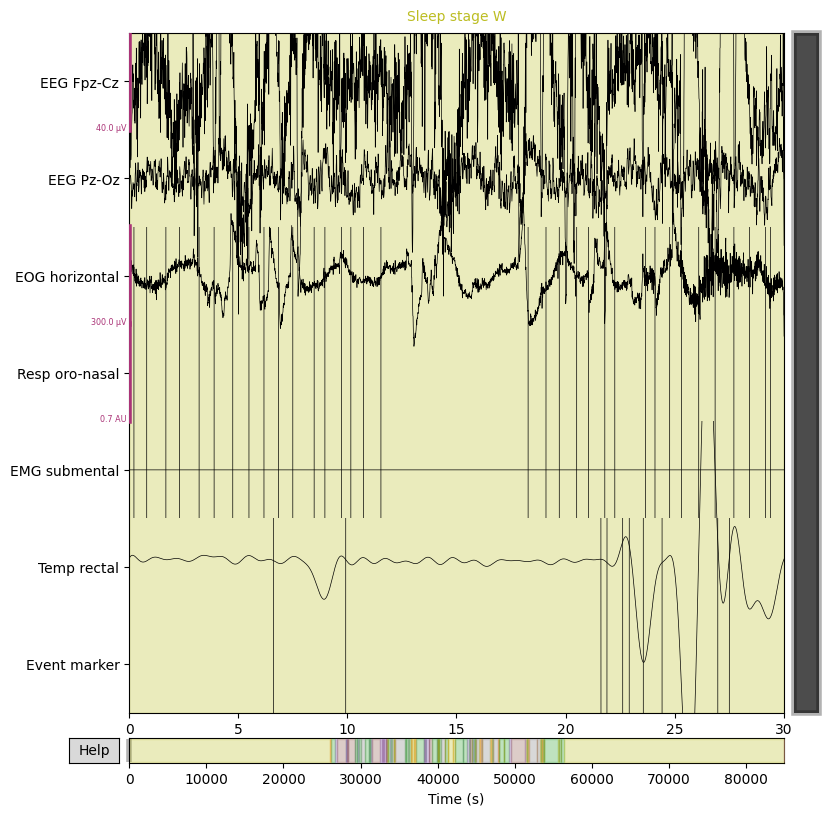

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


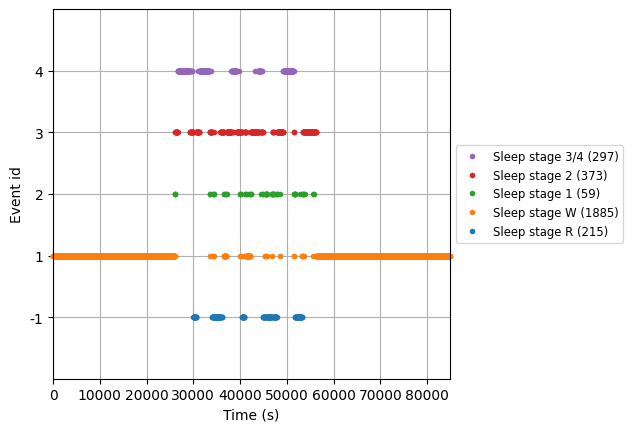

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

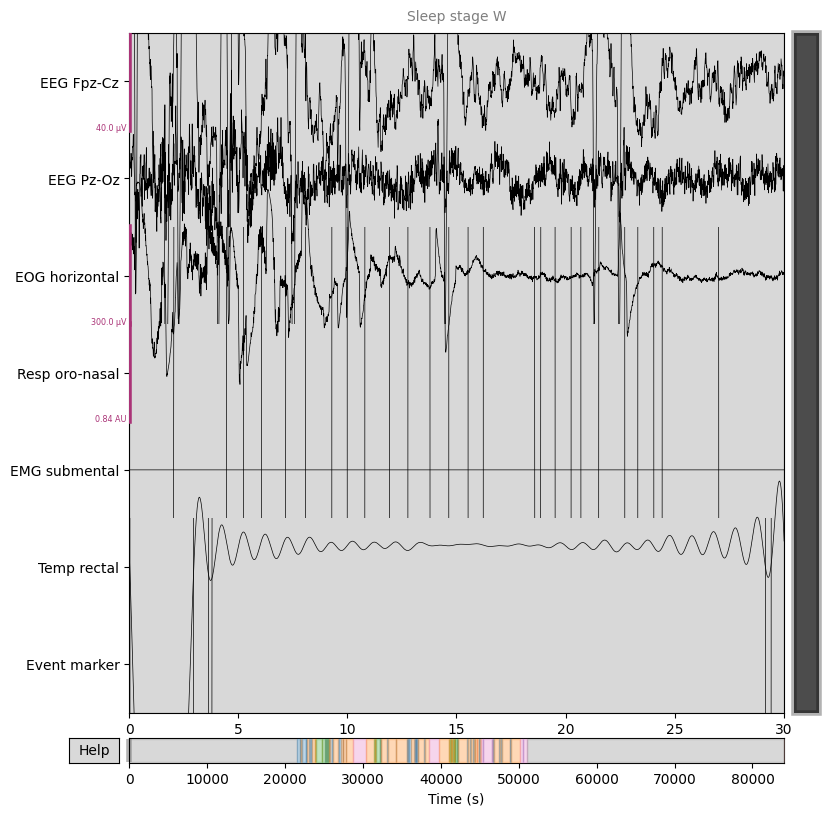

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


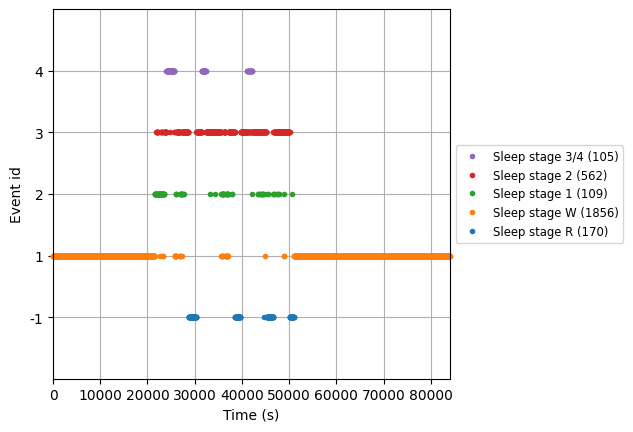

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4012E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

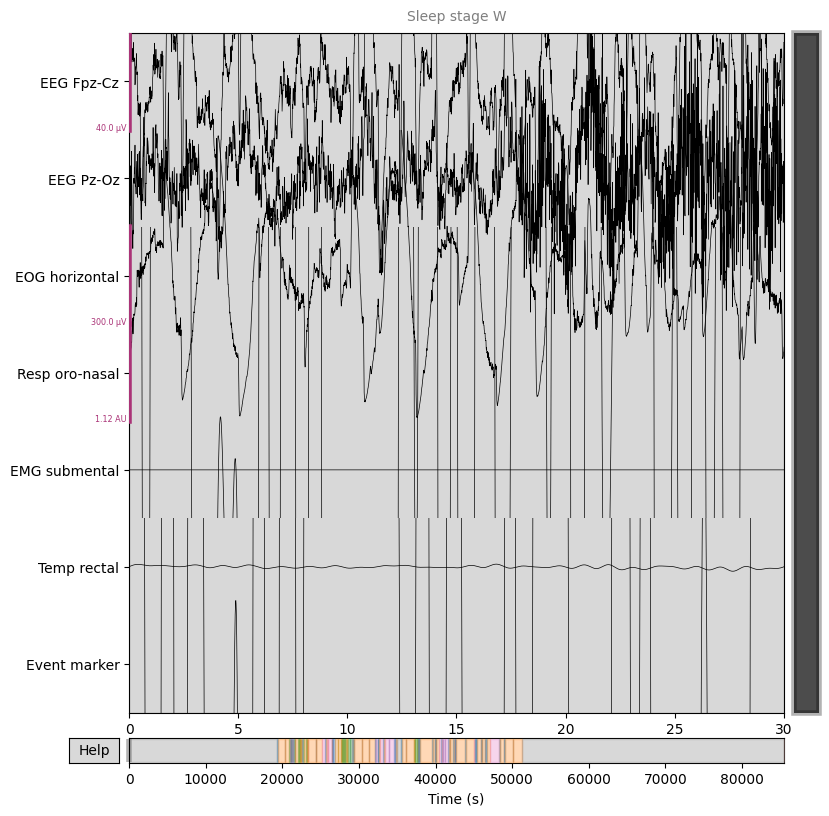

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


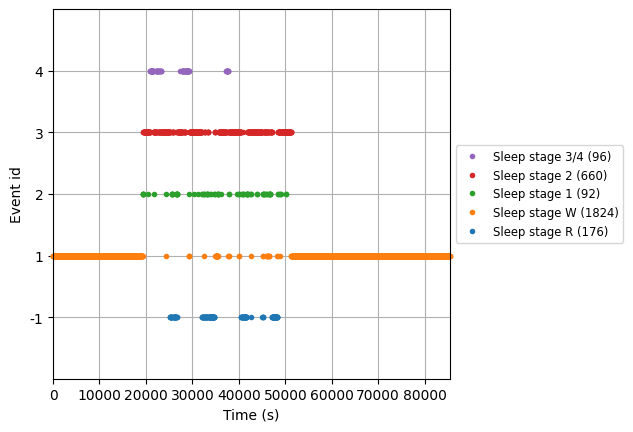

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

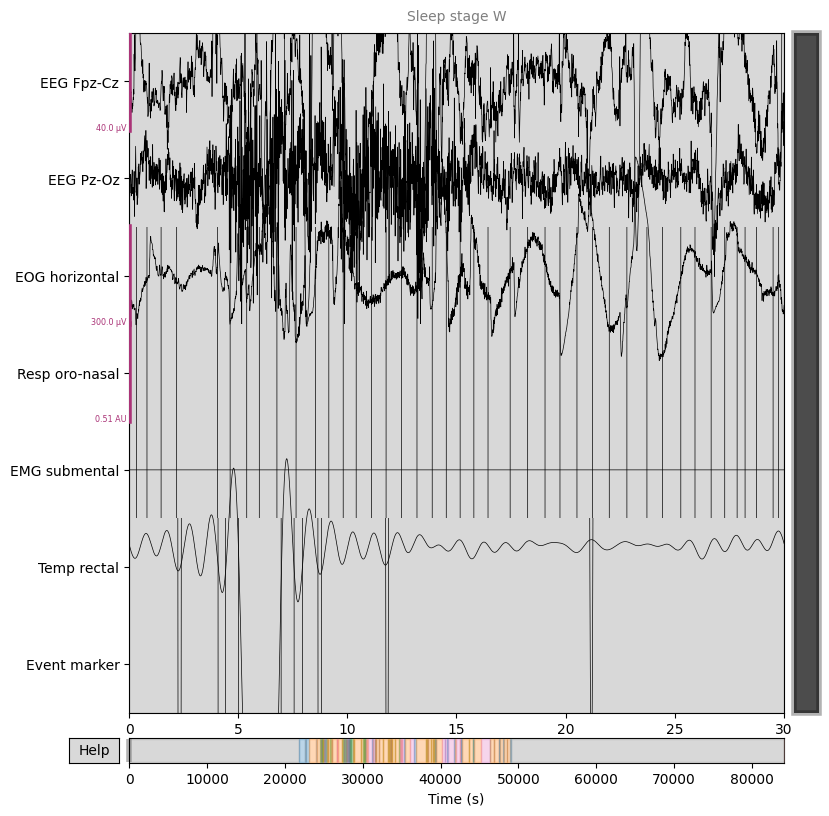

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


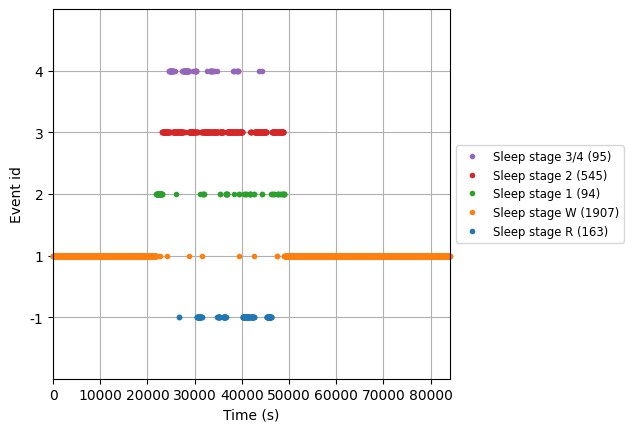

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4022E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

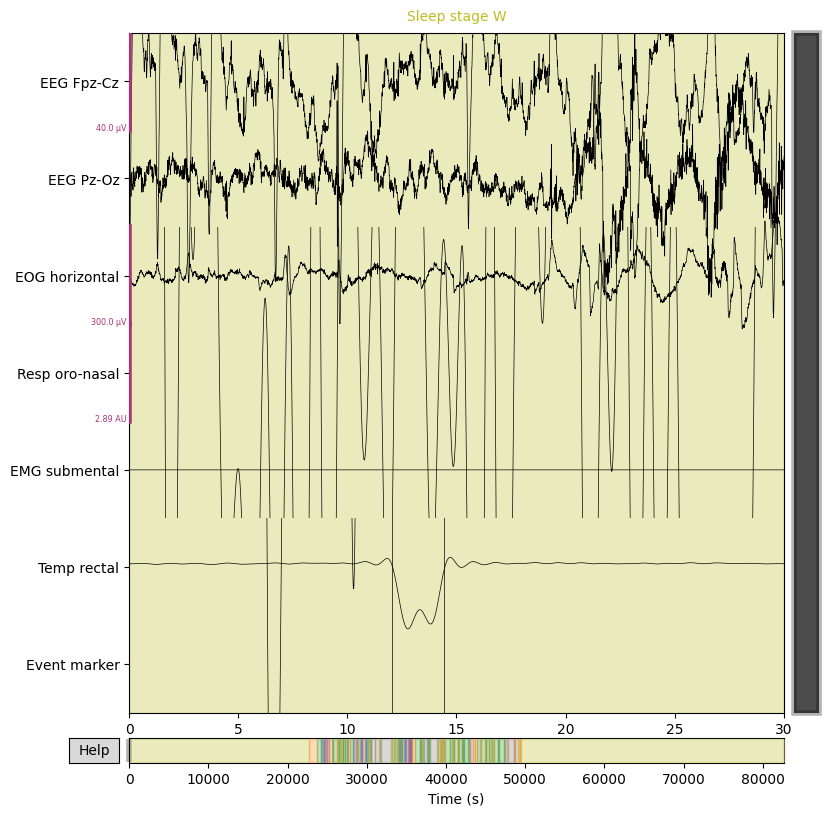

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


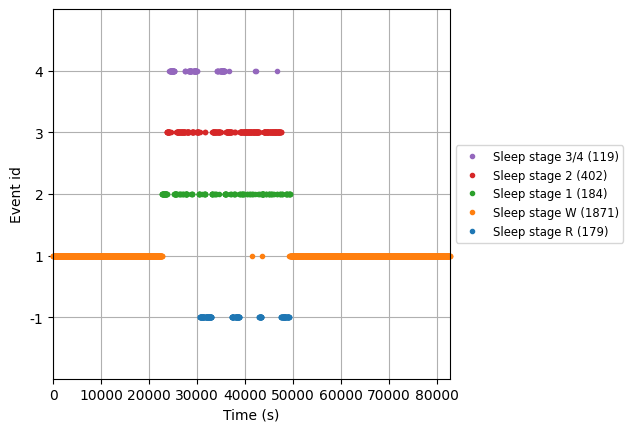

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4031E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

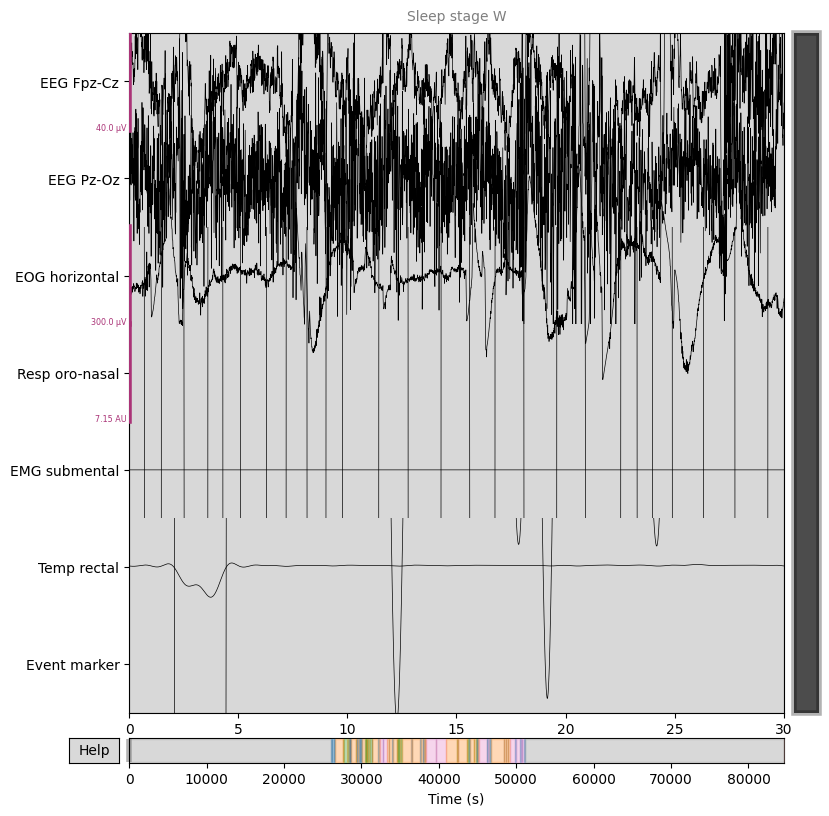

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


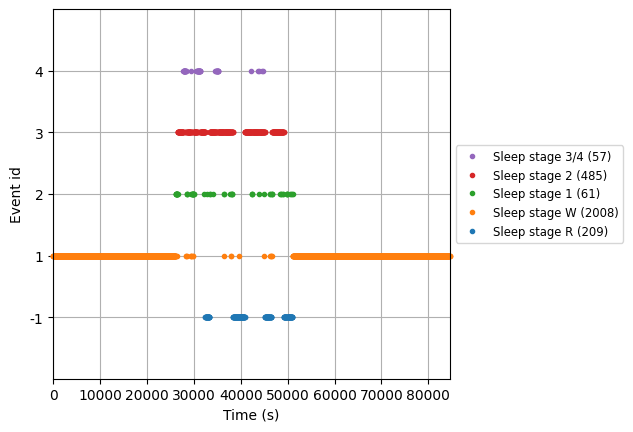

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4032E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

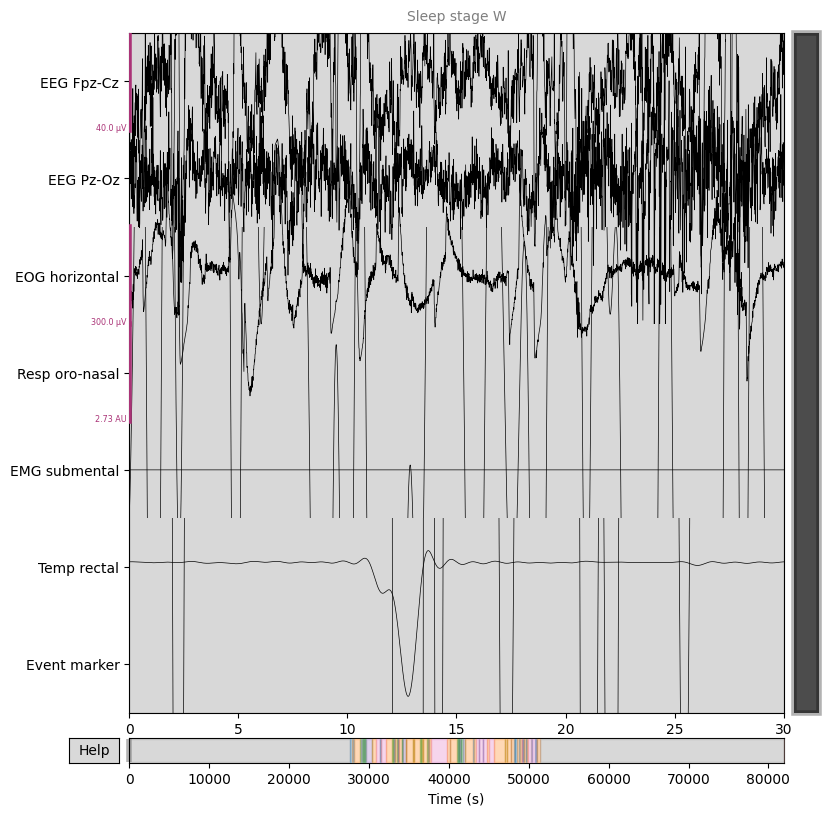

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


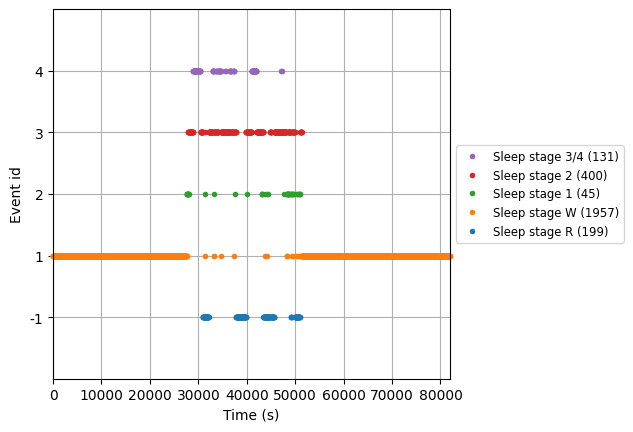

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4041E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

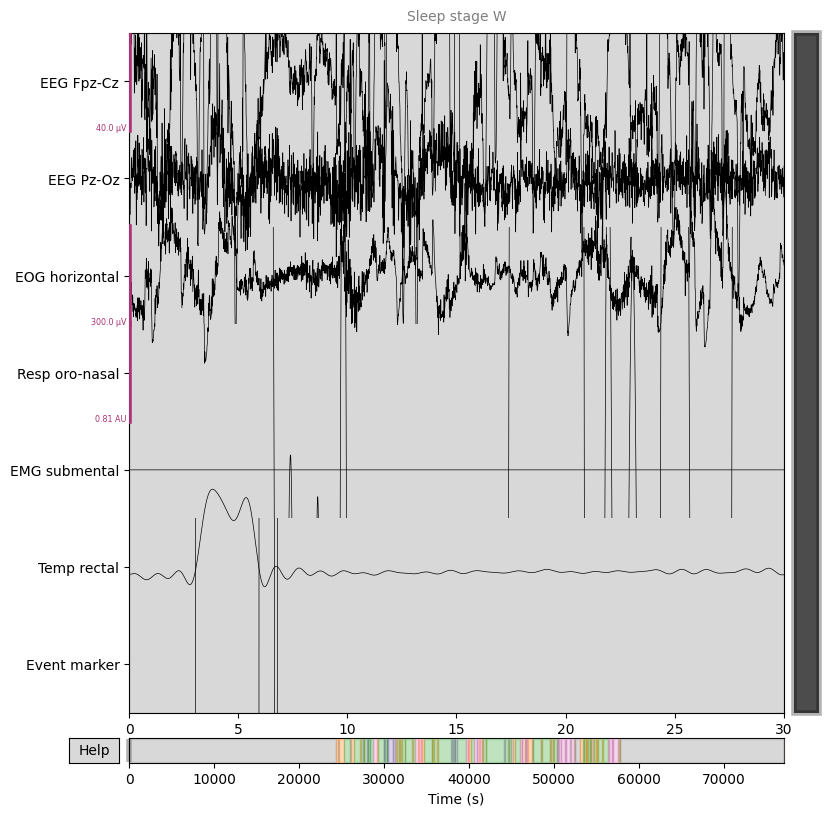

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']


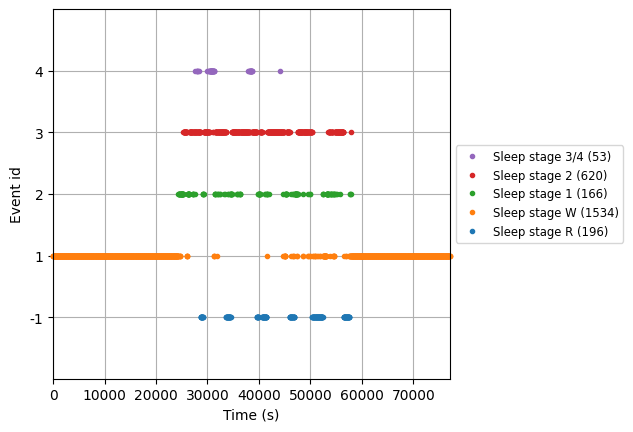

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4042E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

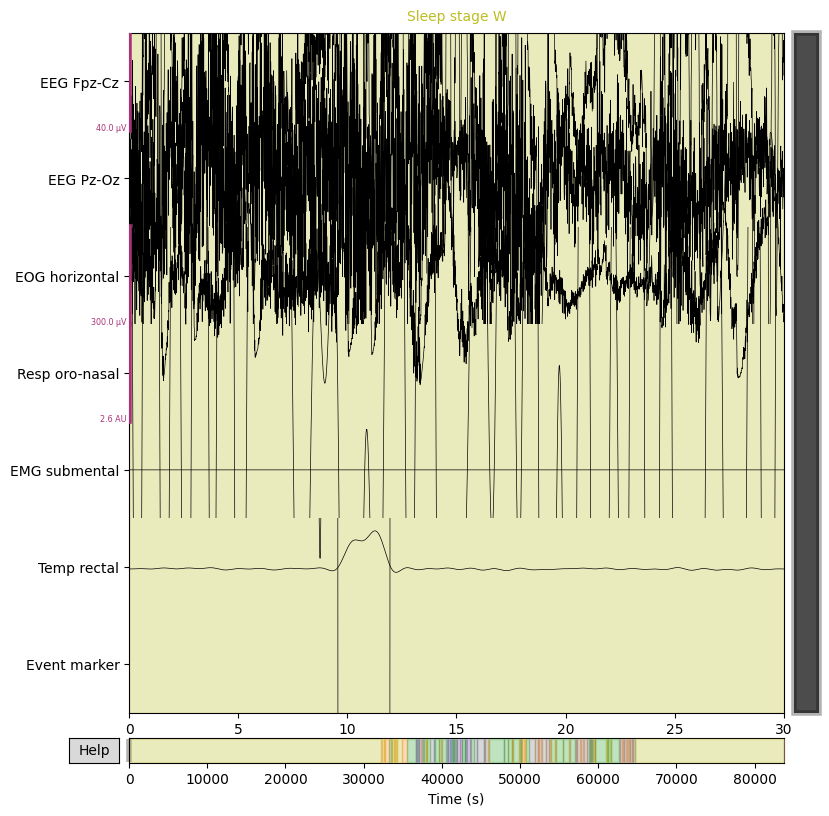

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


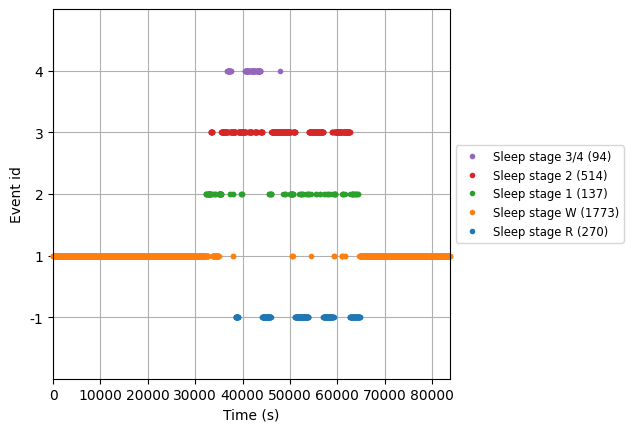

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4051E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

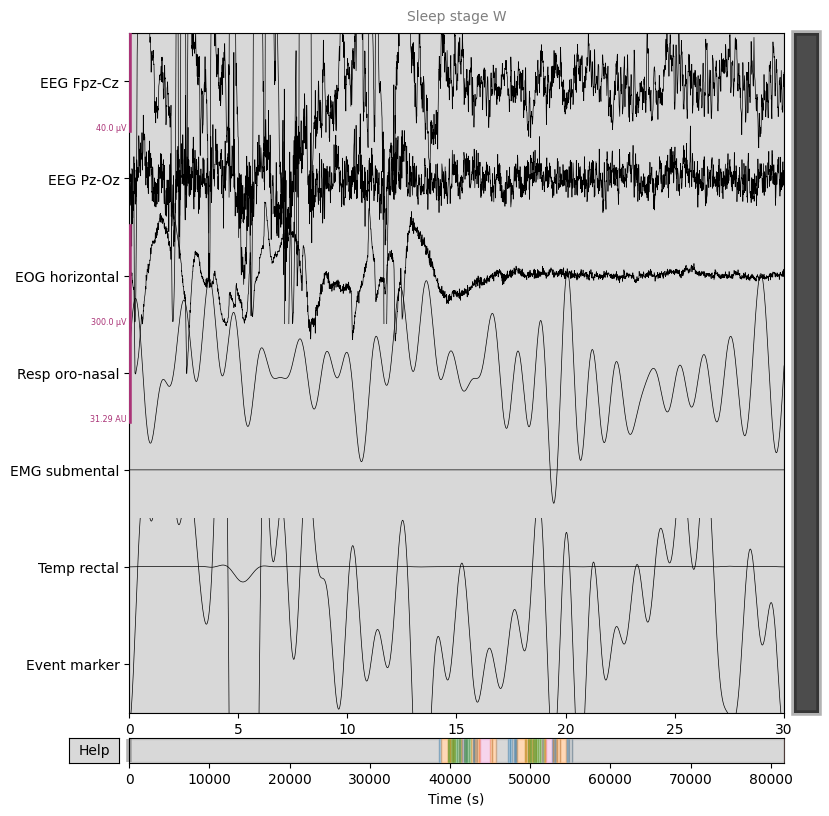

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


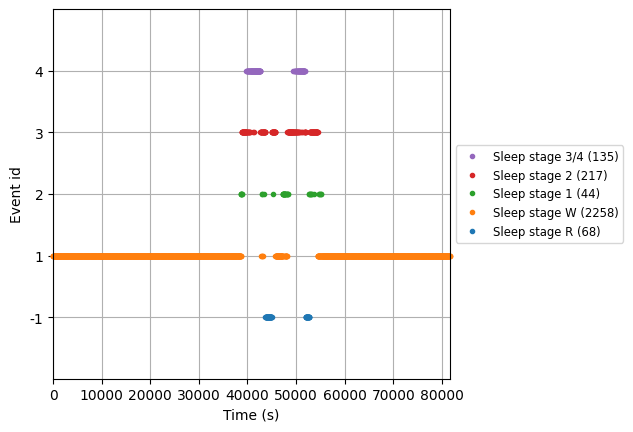

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4052E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

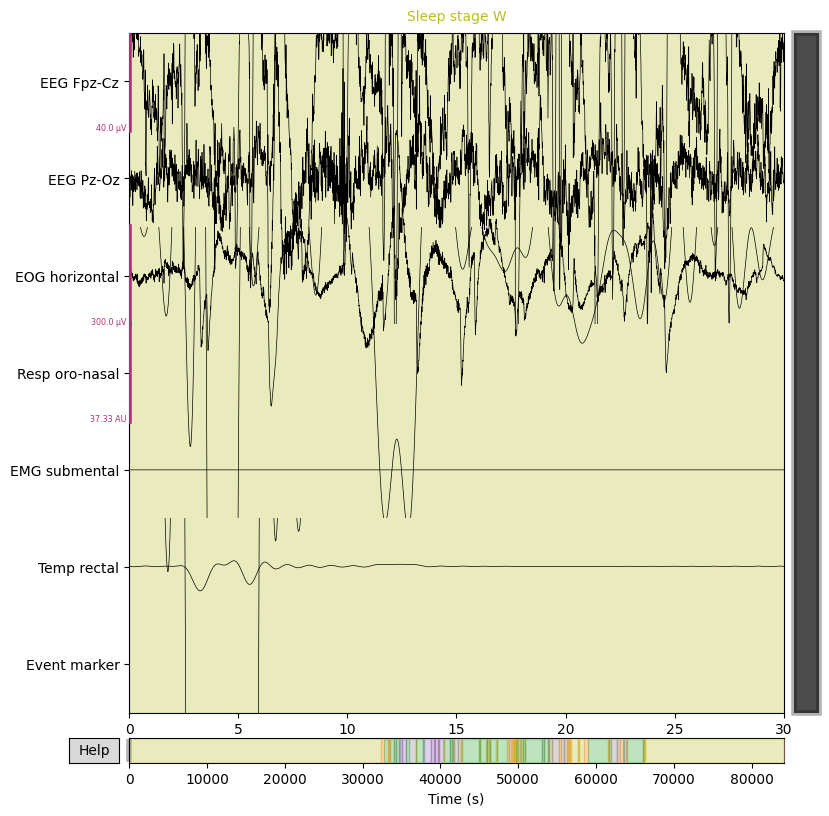

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


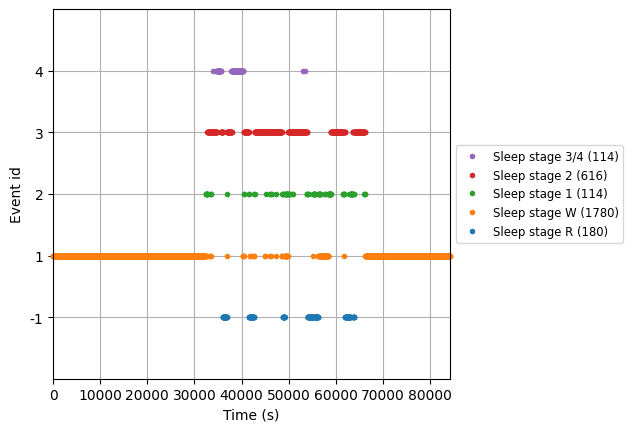

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4061E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

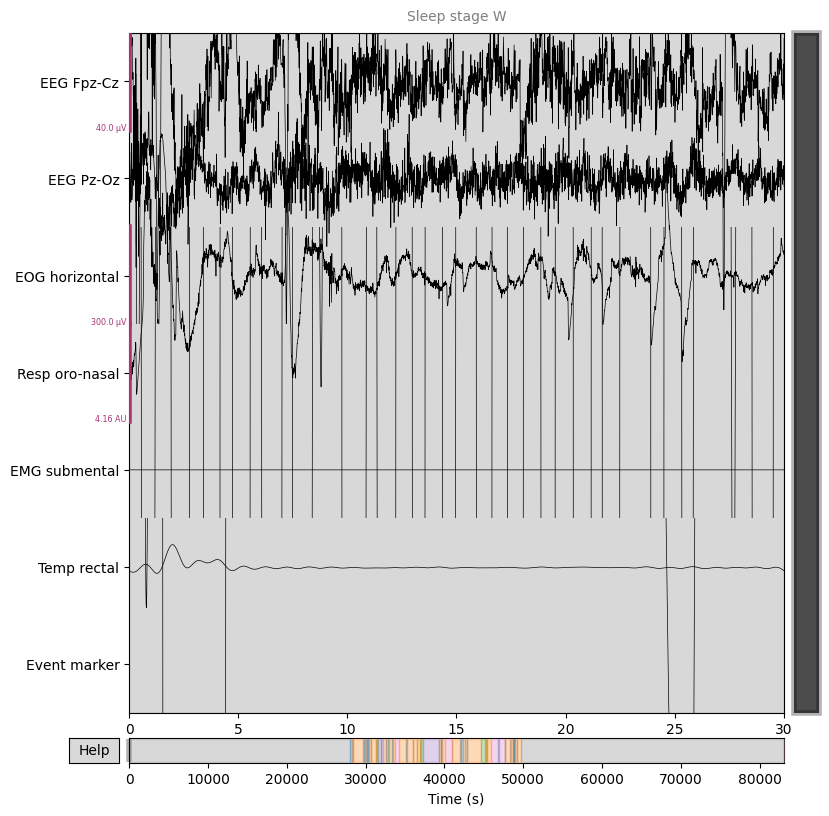

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


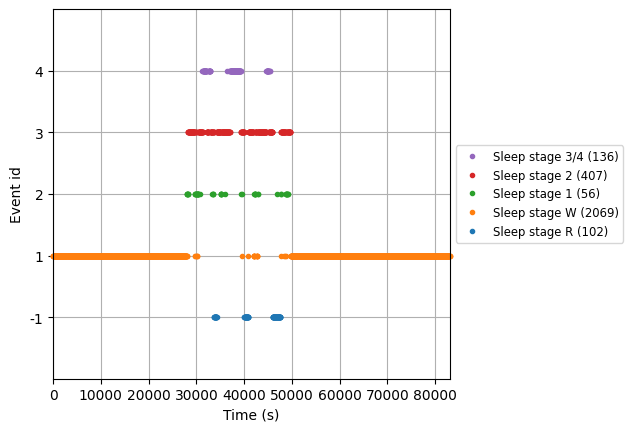

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4062E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

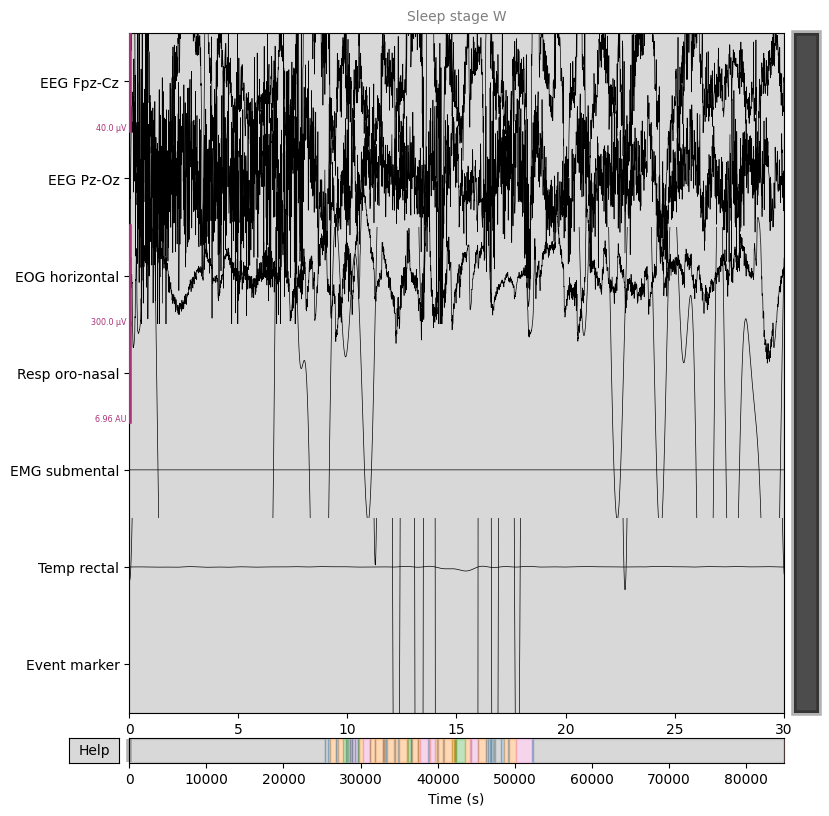

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


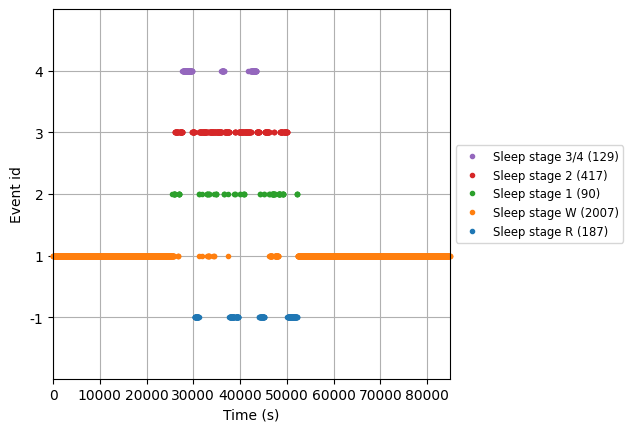

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4071E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

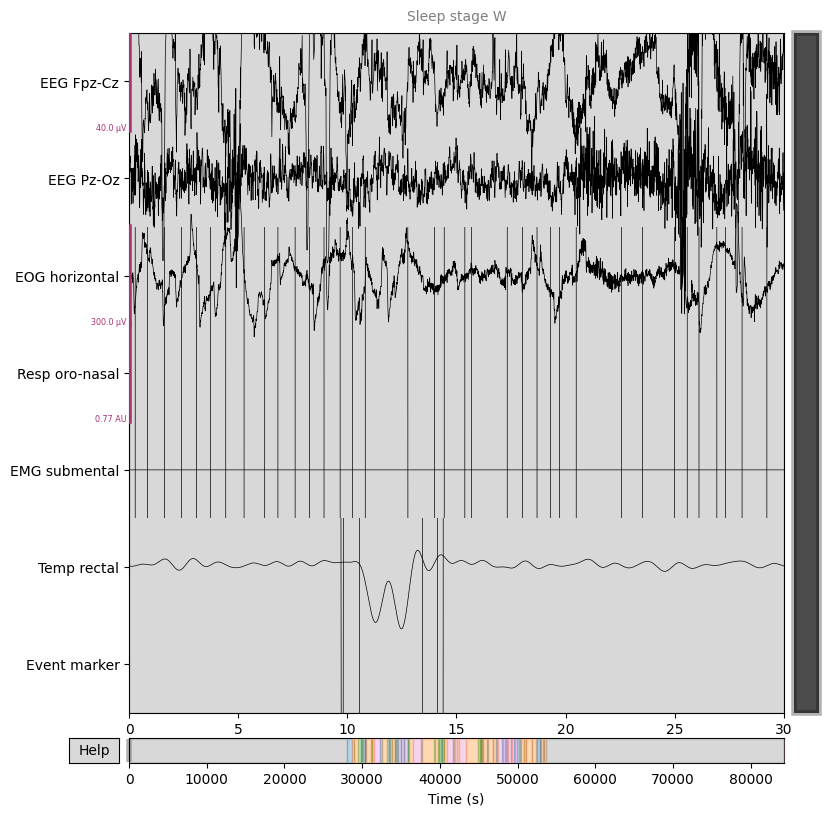

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


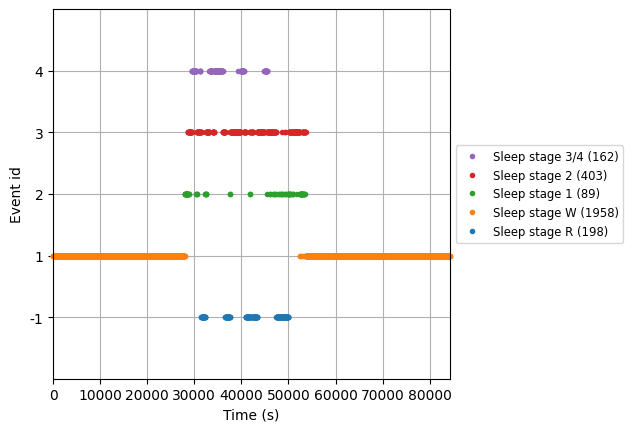

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4072E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

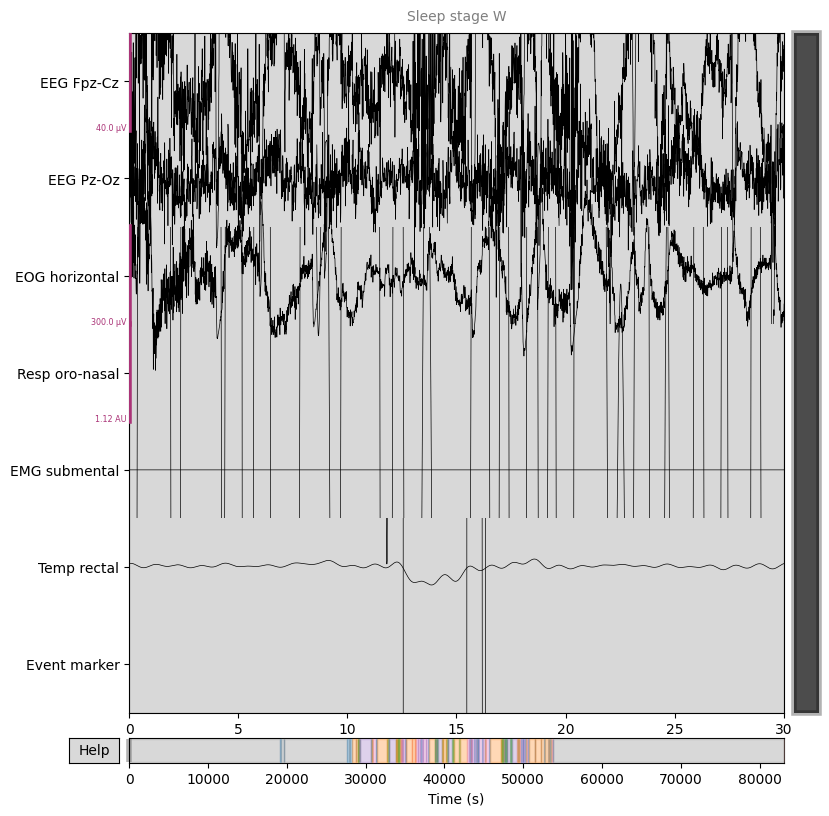

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


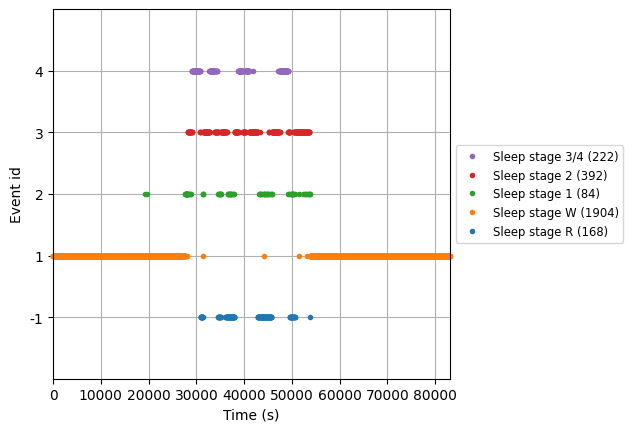

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4081E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

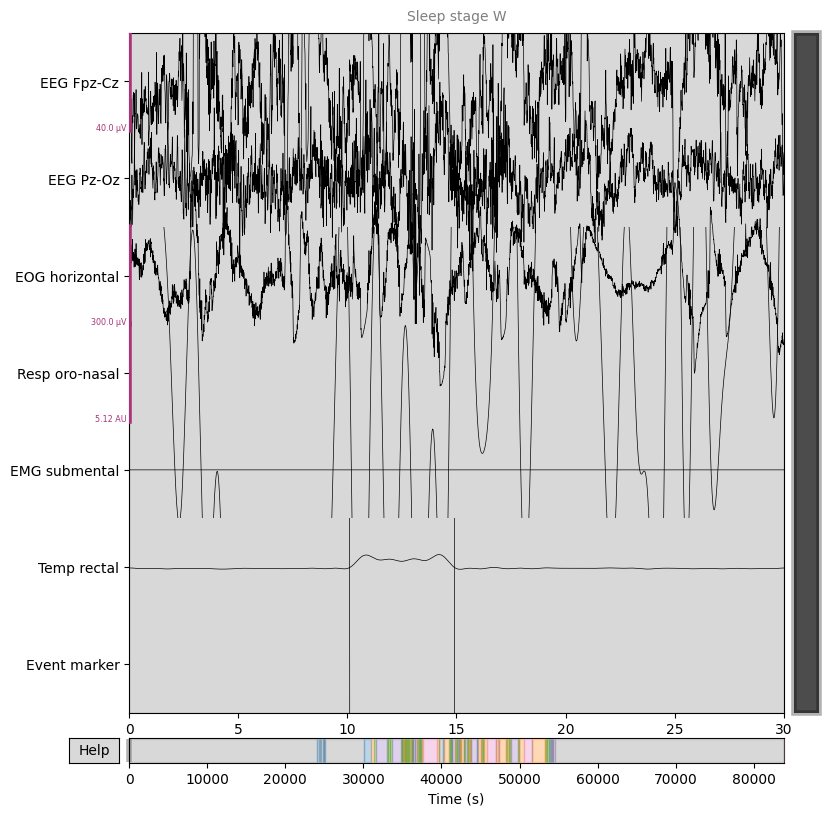

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


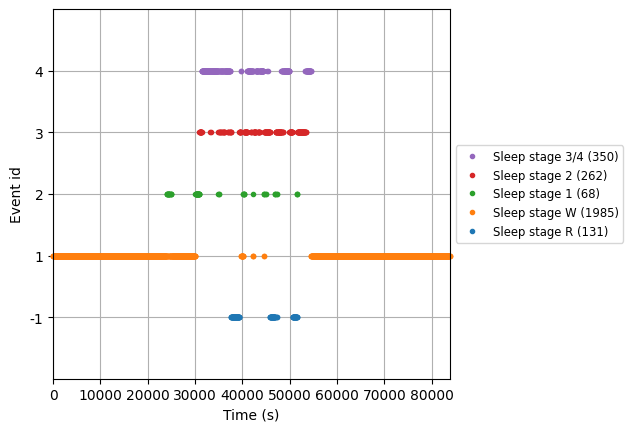

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4082E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

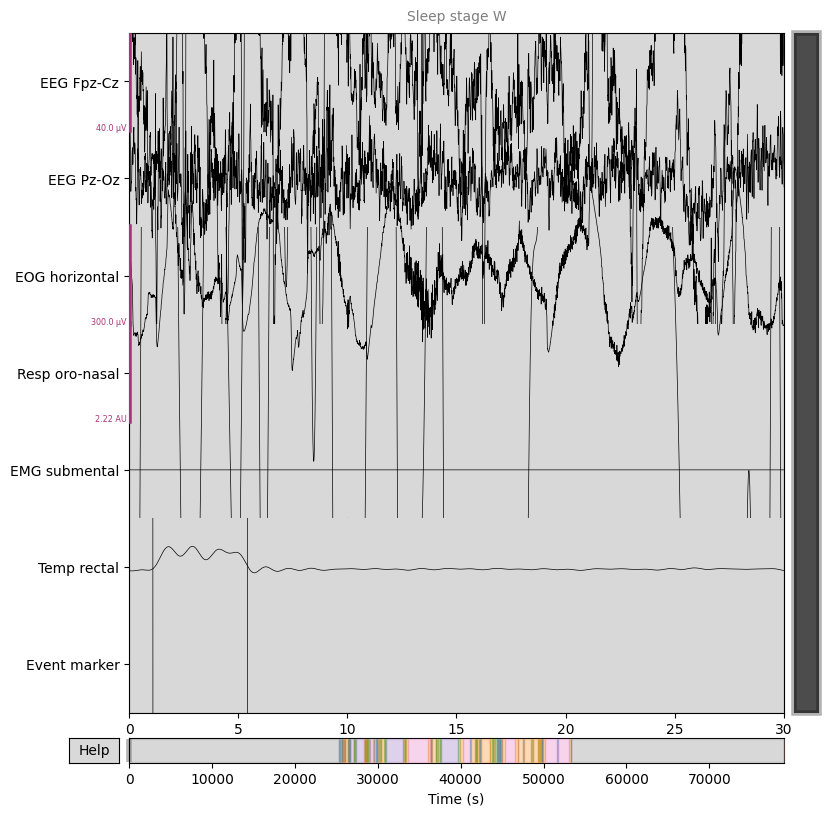

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


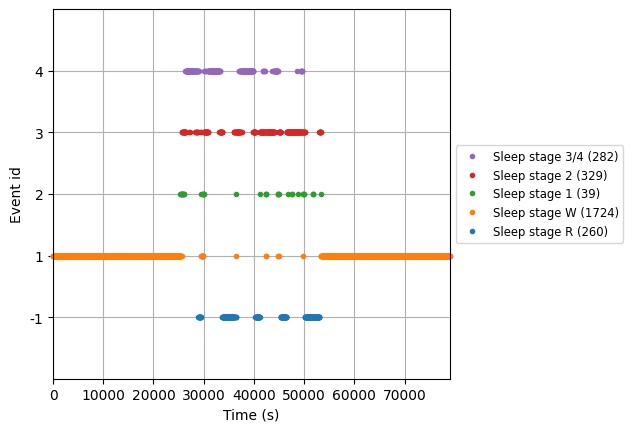

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4091E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

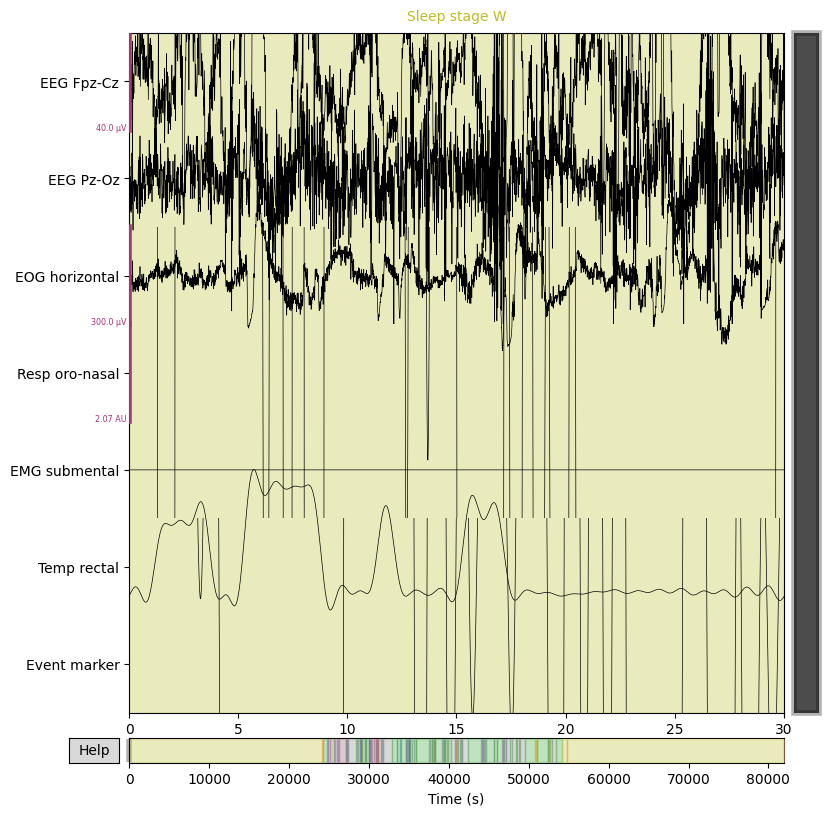

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


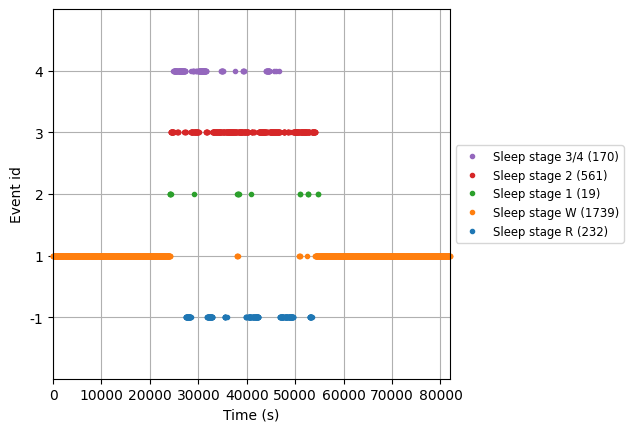

Extracting EDF parameters from /kaggle/input/sleepedf/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4092E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Figure size 640x480 with 0 Axes>

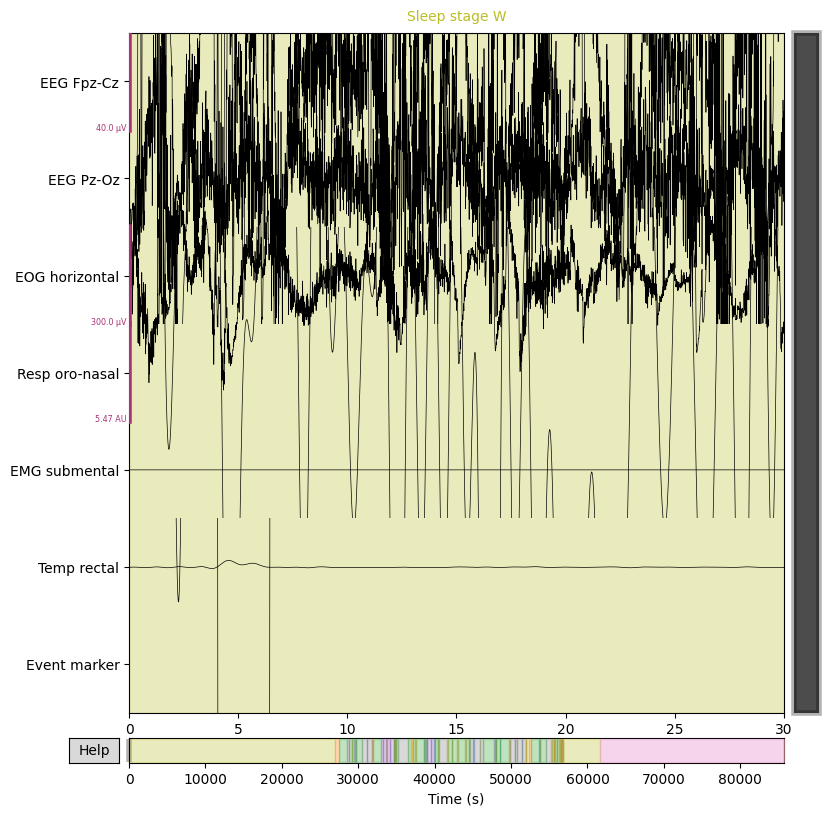

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


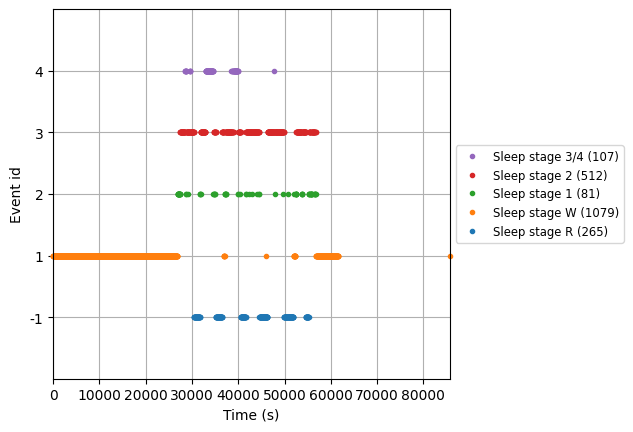

In [78]:
pdf_report = PdfPages('Sleep_Plots.pdf')
for item in tqdm(subject_files[:20]):  # selecting the first 20 subjects
    raw_train = mne.io.read_raw_edf(item[0][0], verbose=VBS)
    annot_train = mne.read_annotations(item[1][0]) 
    
    raw_train.set_annotations(annot_train, emit_warning=False)
    raw_train.set_channel_types(mapping)
    figure = plt.figure()
    figure.suptitle("Subject: " + str(item[0][-13:-11]) + ", Night: " + str(item[0][-11:-10]))
    pdf_report.savefig(figure, bbox_inches='tight')
    pdf_report.savefig(raw_train.plot(duration=30), bbox_inches='tight')
    
    annotation_desc_2_event_id = {'Sleep stage R': -1,
                                  'Sleep stage W': 1,
                                  'Sleep stage 1': 2,
                                  'Sleep stage 2': 3,
                                  'Sleep stage 3': 4,
                                  'Sleep stage 4': 4
    }

    events_train, _ = mne.events_from_annotations(
        raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.)
    
    # create a new event_id that unifies stages 3 and 4
    event_id = {'Sleep stage R'  : -1,
                'Sleep stage W'  : 1,
                'Sleep stage 1'  : 2,
                'Sleep stage 2'  : 3,
                'Sleep stage 3/4': 4
    }
    # plot events and saving them in PDF report
    pdf_report.savefig(mne.viz.plot_events(events_train, event_id=event_id,
                        sfreq=raw_train.info['sfreq']), bbox_inches='tight')
pdf_report.close()


In [80]:
!pip install hurst

In [92]:
npz_files = sorted(glob.glob(os.path.join(output_path, "*.npz")))
X = np.zeros((0, 3000, 1))
y = []

for fn in tqdm(npz_files[:number_of_subj]):
    samples = np.load(fn)
    X_data = samples['x']
    # Reshape X_data to have three dimensions
    X_data = np.expand_dims(X_data, axis=-1)
    X = np.concatenate((X, X_data), axis=0)
    y.extend(samples['y'])

y = np.array(y)


  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Frequency of the labels in our dataset')

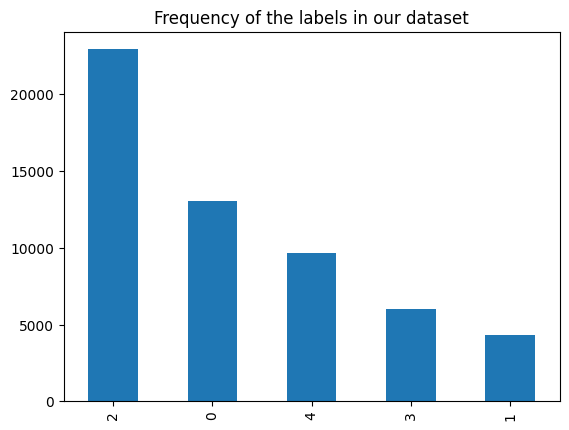

In [93]:
pd.Series(y).value_counts().plot.bar()
plt.title("Frequency of the labels in our dataset")

In [94]:
if VBS:
    print("Shape of the input data: {}".format(X.shape))
    print("Shape of the sleep stages: {}".format(y.shape))
# splitting subjects
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)
# splitting sleeping signals
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed)
if VBS:
    print("Shape of the training dataset:\ntraining dataset: {}\ntest_dataset: {}\n"
          .format(X_train.shape, X_test.shape))
y_train_ = to_categorical(y_train)
y_val_ = to_categorical(y_val)
y_test_ = to_categorical(y_test)

# X_train = np.squeeze(X_train)
# X_test = np.squeeze(X_test)
# X_val = np.squeeze(X_val)

Shape of the input data: (55989, 3000, 1)
Shape of the sleep stages: (55989,)
Shape of the training dataset:
training dataset: (45351, 3000, 1)
test_dataset: (5599, 3000, 1)

